# A simple NN implementation without frameworks

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import simple_nn.simple_nn as snn
importlib.reload(snn)

<module 'simple_nn.simple_nn' from 'C:\\Users\\Jonordona\\Desktop\\data_resources\\DeepLearning\\simple_nn\\simple_nn.py'>

## Training data

In [3]:
X = np.matrix([[2, 1, 3, 2], [1, 2, 2, 4]])

Y = np.matrix([[0, 1, 0, 1]])

## Hyperparameters

In [4]:
layers = 2
units_per_layer = [2, 1]
l_rate = 0.01
iterations = 7000

## NN Training

In [5]:
nn = snn.NeuralNetwork(layers, units_per_layer, l_rate, iterations)

In [6]:
np.random.seed(3)
nn.initialize_params(X)

In [7]:
nn.optimize(X, Y)

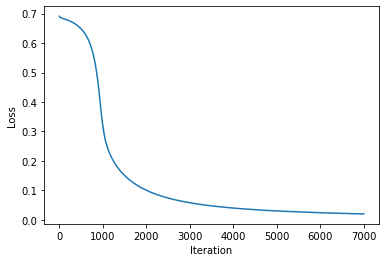

In [8]:
plt.plot(nn.train_cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Decision boundary

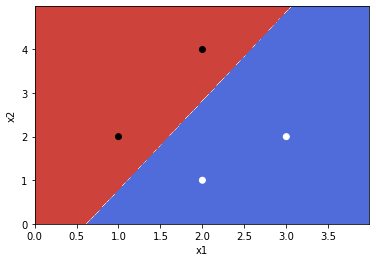

In [9]:
snn.plot_decision_boundary(lambda x: nn.predict(x.T), X, list(Y))

---

# Noisy moons dataset

In [10]:
from numpy import genfromtxt
noisy_moons = genfromtxt('data/noisy_moons.csv', delimiter=',')
noisy_moons_X = np.asmatrix(noisy_moons[:,:2])
noisy_moons_Y = np.asmatrix(noisy_moons[:,2])

## Hyperparameters

In [11]:
layers = 4
units_per_layer = [10, 8, 6, 1]
l_rate = 0.01
iterations = 17000

## Training

In [12]:
np.random.seed(4)
nn = snn.NeuralNetwork(layers, units_per_layer, l_rate, iterations)
nn.initialize_params(noisy_moons_X.transpose())
nn.optimize(noisy_moons_X.transpose(), noisy_moons_Y)

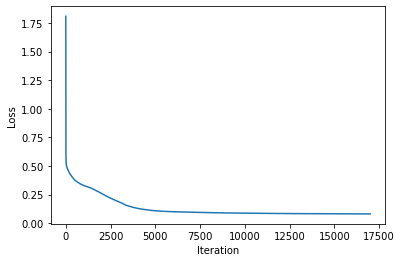

In [13]:
plt.plot(nn.train_cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Decision boundary

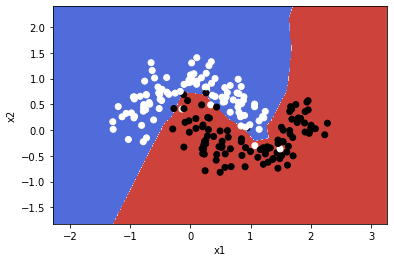

In [14]:
snn.plot_decision_boundary(lambda x: nn.predict(x.T), noisy_moons_X.transpose(), list(noisy_moons_Y))

### Let's try a much larger network to try to provoke overfitting to the training set

In [29]:
layers = 6
units_per_layer = [20, 30, 16, 15, 14, 1]
l_rate = 0.01
iterations = 17000

In [30]:
np.random.seed(18)
nn = snn.NeuralNetwork(layers, units_per_layer, l_rate, iterations)
nn.initialize_params(noisy_moons_X.transpose())
nn.optimize(noisy_moons_X.transpose(), noisy_moons_Y)

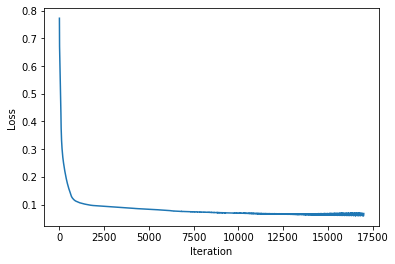

In [31]:
plt.plot(nn.train_cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

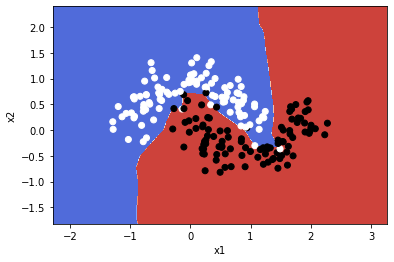

In [32]:
snn.plot_decision_boundary(lambda x: nn.predict(x.T), noisy_moons_X.transpose(), list(noisy_moons_Y))

#### We are overfitting by some amount with this large network, as well as obtaining strange artefacts in the cost function at the final iterations.

#### Let's try using L2 regularization and drop-out